# ECG

### [The MIT-BIH Long Term Database](https://archive.physionet.org/physiobank/database/ltdb/)
#### This database contains 7 long-term ECG recordings (14 to 22 hours each), with manually reviewed beat annotations.

#### 14046 – Age: 46  Sex: M

## Waveform
<br>
<img src="14046.png" alt="ECG_DB">

In [1]:
# Importar as bibliotecas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Definir a taxa de amostragem
# 0.0078125 s = 128 Hz
sample_rate = 128

In [3]:
# Importar os dados
db = pd.read_csv('14046.csv')
db

,'sample interval','ECG1','ECG2'
0,'0.0078125 sec','mV','mV'
1,0,0.160,-0.290
2,1,0.180,-0.300
3,2,0.170,-0.320
4,3,0.180,-0.290
...,...,...,...
7676,7675,-0.100,-0.280
7677,7676,-0.110,-0.300
7678,7677,-0.120,-0.280
7679,7678,-0.110,-0.270


In [4]:
db.columns = ['sample interval', 'ECG1', 'ECG2']
db

,sample interval,ECG1,ECG2
0,'0.0078125 sec','mV','mV'
1,0,0.160,-0.290
2,1,0.180,-0.300
3,2,0.170,-0.320
4,3,0.180,-0.290
...,...,...,...
7676,7675,-0.100,-0.280
7677,7676,-0.110,-0.300
7678,7677,-0.120,-0.280
7679,7678,-0.110,-0.270


In [5]:
filtro = db.loc[(db['ECG1'] == "'mV'")]
filtro
db = db.drop(filtro.index)

In [6]:
db.dtypes

sample interval    object
ECG1               object
ECG2               object
dtype: object

In [7]:
data = db['ECG2'].astype(float, errors = 'raise')

## Plot waveform

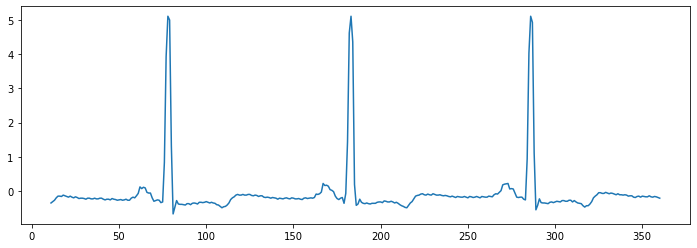

In [8]:
plt.figure(figsize=(12,4))
plt.plot(data[10:360])
plt.show()

bpm: 76.462665
ibi: 784.696691
sdnn: 33.210081
sdsd: 33.513062
rmssd: 40.228801
pnn20: 0.424242
pnn50: 0.030303
hr_mad: 15.625000
sd1: 28.414516
sd2: 31.616417
s: 2822.297421
sd1/sd2: 0.898727
breathingrate: 0.333333


C:\Users\Lucia\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

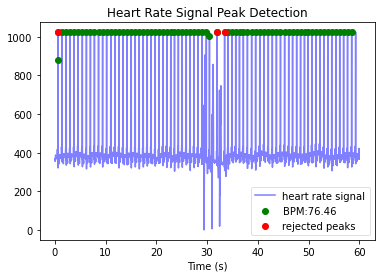

In [14]:
# Análise
wd, m = hp.process(hp.scale_data(data), sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

# Mostrar as medidas computadas
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))